# Data collection

> **Important notes for this notebook**
>
> This course module introduces fundamental concepts regarding designing
> and executing GWAS. We touch on data collection (which involves
> gathering genomic data and phenotypic information from diverse
> populations), potential biases, and practical considerations on the
> standard file formats in GWAS.
>
> ## Learning outcomes
>
> -   **Understand and identify** types of GWAS studies in the
>     scientific literature
> -   **Explore** the content of classical data files for GWAS through
>     the command line
> -   **Apply and extend** some command line programs to retrieve and
>     explore data
>
> ## How to make this notebook work
>
> We will only use the `bash command line` in this notebook. Be sure to
> click on the menu `Kernel --> Change Kernel --> Bash`
>
> <img src="Images/bash.png" alt="Bash" width="80"> Choose the Bash
> kernel

# Introduction to study design

GWAS often require very large sample sizes to identify reproducible
genome-wide significant associations, and one would need to conduct
power calculations to determine the appropriate sample size. Generally
speaking, there are two types of study design depending on the nature of
the trait of interest:

-   **1)** Case-control studies when the trait of interest is
    dichotomous (e.g. Type 2 diabetes)
-   **2)** Quantitative measurements on the whole study sample when the
    trait is quantitative (e.g. height)

In addition, one can choose between population-based and family-based
designs. The choice generally depends on the data you have available -
that is, if you have fewer samples, you can control for close
relationships in your analyses rather than removing related individuals.

<figure>
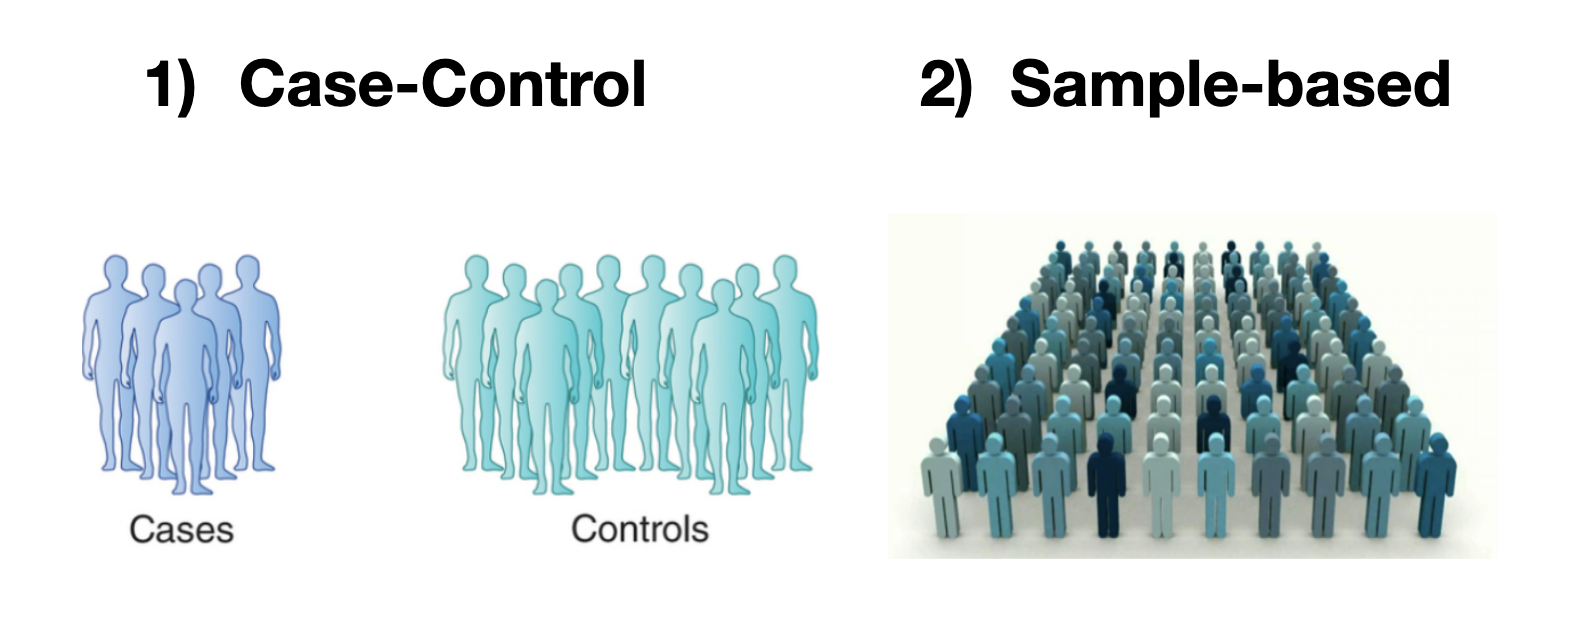
<figcaption aria-hidden="true">Figure 1. Potential study
designs</figcaption>
</figure>

The goal of data collection is to ensure you have all the essential
information required for downstream analyses. These areas of information
could include:

-   Biological samples: blood samples or similar (for later genotyping)
-   Information about the traits of interest
-   Clinical data: disease status e.g. have diabetes (case) vs do not
    have diabetes (control)
-   Quantitative measurements e.g. biometric data, cholesterol, blood
    pressure, or blood sugar
-   Questionnaires: additional potentially relevant info, like sex, age,
    or lifestyle

It is crucial to understand that any method used to obtain the required
data will require informed consent and ethical approval. Achieving this
can be quite challenging in practice, which is why publicly available
biobanks are so widely utilized.

GWAS can be conducted using data from resources such as biobanks,
cohorts with disease-focused or population-based recruitment, or
direct-to-consumer studies. Several excellent public resources provide
access to large cohorts with genotypic and phenotypic information, and
the majority of GWAS are conducted using these preexisting resources.
Some notable examples include the UK Biobank, FinnGen, Biobank Japan,
and the All of Us Research Program.

Recruitment strategies must be carefully considered for all study
designs as these can induce various forms of bias. For example, widely
used research cohorts such as the UK Biobank recruit participants
through a volunteer-based strategy. What this means in practice is that
participants are, on average, healthier, wealthier, and more educated
than the general population. Furthermore, cohorts that enroll
participants from hospitals based on their disease status (such as
BioBank Japan (Nagai et al. 2017)) will have different selection biases
to cohorts recruited from the general population. Unlike research
studies that focus on one disease or group of people, the new American
initiative known as All of Us is building a diverse database designed to
inform thousands of studies on a variety of health conditions. Different
ethnicities, like the example just mentioned, can be included in the
same study to make better predictions for people with different
backgrounds, as long as the population substructure is considered to
avoid false positive results.

Finally, study annotation is essential for rigorous scientific practice.
This involves detailing the chosen study design, providing a thorough
description of the study, and including specifics such as sample
inclusion criteria (e.g., ancestry, clinical features) and the phenotype
of interest in your association analysis.

# Genotyping

Genotyping efficiently captures genetic variation by selecting
informative SNPs, often in high linkage disequilibrium (LD), which
reduces redundancy. Focusing on these SNPs minimizes computational load
and improves cost-efficiency for a specific population.

Genotypic data can be obtained through microarrays to detect common
variants, or through next-generation sequencing techniques for
whole-genome sequencing (WGS) or whole-exome sequencing (WES).
Microarray-based genotyping is the most commonly used method for
obtaining genotypes for GWAS owing to the current cost of
next-generation sequencing. However, as shown in the figure below, the
decreasing cost per human genome is expected to make WGS the preferred
method. Nevertheless, the choice of genotyping platform depends on many
factors and tends to be guided by the purpose of the GWAS. For example,
in a consortium-led GWAS, it is usually wise to have all individual
cohorts genotyped on the same genotyping platform (to avoid problems
with batch bias).

To enhance the power of GWAS, large reference panels are used to impute
genotype data. This statistical technique predicts unobserved genotypes
in the study sample based on observed genotypes and a reference panel.
In other words, imputation fills in missing genotypes, increasing the
number of variants that can be tested for association with traits. As
mentioned before, it is crucial for the reference panel to be large and
diverse to capture the genetic diversity of the entire population.

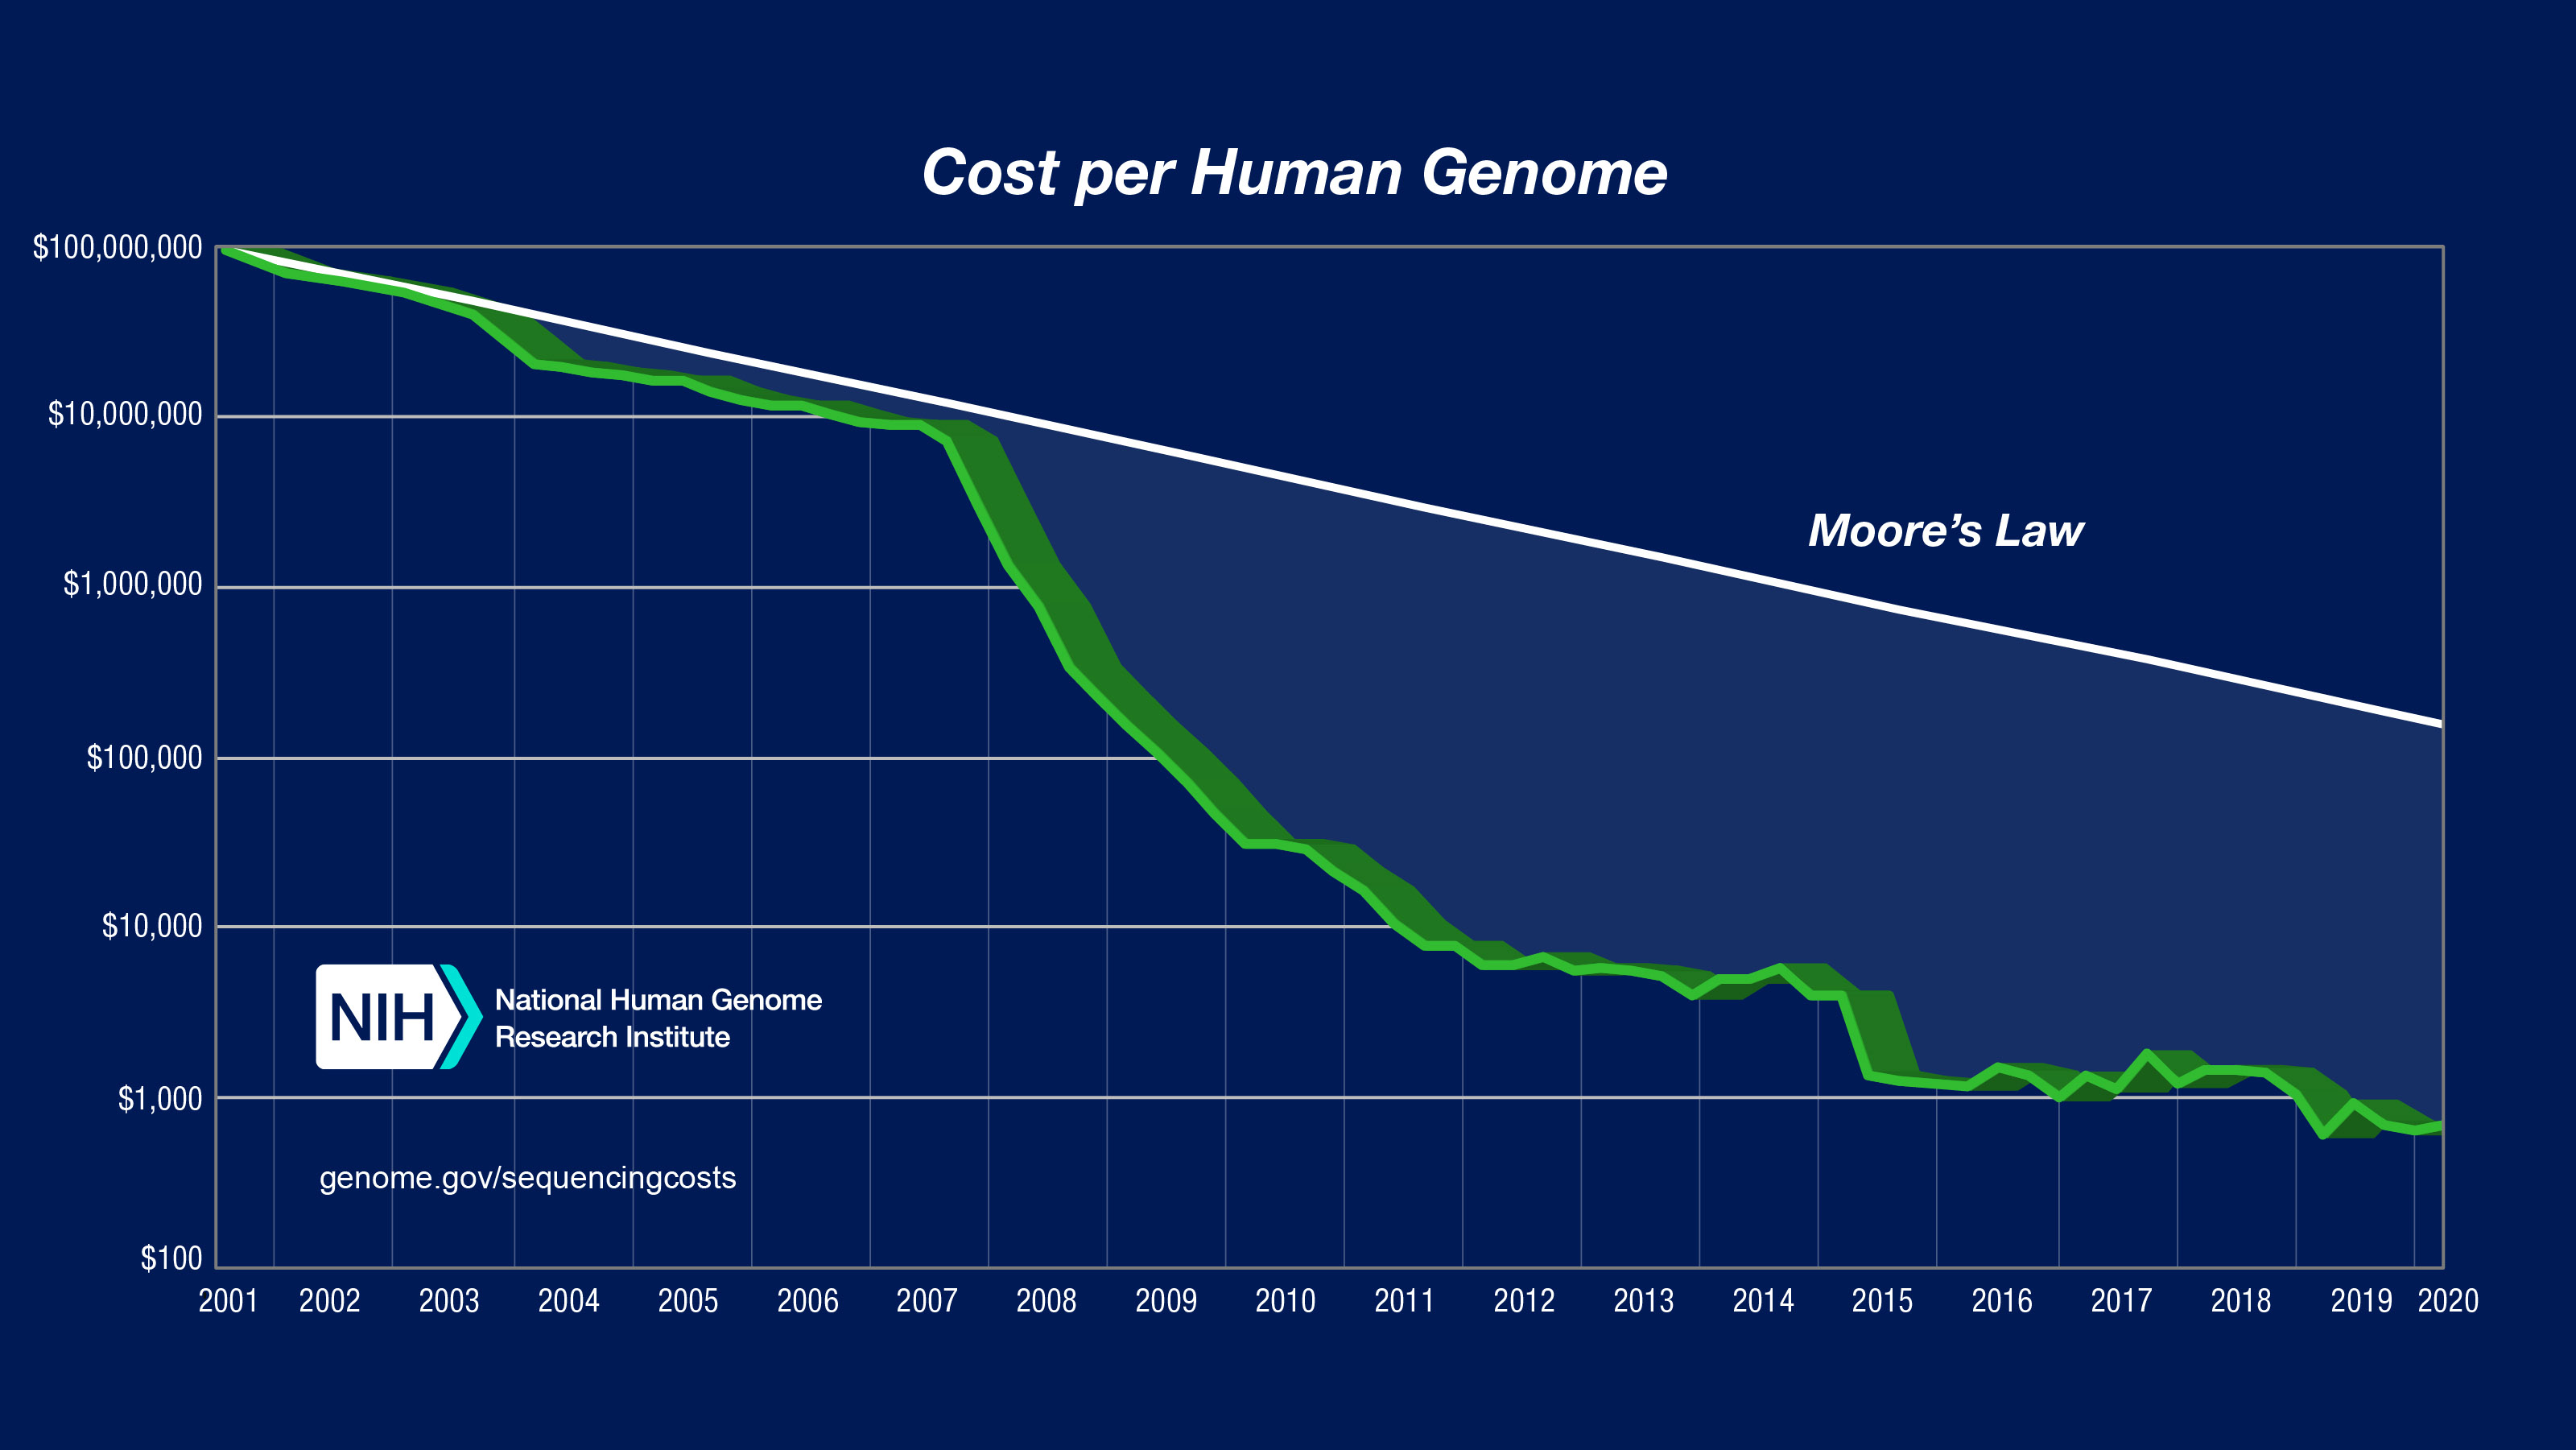{label:fig-cost}

# Data files

After alignment and variant calling, genetic variation data is typically
stored in formats like VCF and PLINK. While VCF is a detailed,
text-based format, PLINK uses a more compact binary format that is
faster and more efficient for large-scale analyses, such as GWAS. These
formats are interchangeable, but we will focus on PLINK due to its
common use and optimized performance for GWAS.

When raw or genotype-level data is available, the genotyping parser
extracts key information for each sample from the study annotation
files, including:

-   Family ID
-   Sample ID
-   Paternal ID (for family-based studies)
-   Maternal ID (for family-based studies)
-   Sex
-   Phenotype (discrete or quantitative)
-   Group/cluster (eg, geographical region) to assess possible effects
    of population stratification

The PLINK format consists of 3 different binary files:

-   `.bed`: a binary file containing genotype data.
-   `.bim`: plain text file information about each SNP in the dataset
    (chr, snpId, genetic position, alleles). The order of the SNPs is
    the same as in the bed file.
-   `.fam`: plain text file with information about the samples (family
    ID, individual ID, sex).

Visit the [PLINK website](https://www.cog-genomics.org/plink/1.9/) for
information on various file formats and helpful command lines for
manipulating, processing, and analyzing genomic data.

## Description of the Data

To demonstrate all analysis steps with realistic genetic data, we will
use a simulated dataset (N = 165) with a binary outcome measure, based
on the publicly available data from the International HapMap Project
(Gibbs et al. 2003). For this tutorial, we only included Utah residents
with ancestry from Northern and Western Europe (CEU) to create an
**ethnically homogenous** dataset. Because of the relatively small
sample size of the HapMap data, genetic effect sizes in these
simulations were set at values larger than usually observed in genetic
studies of complex traits. It is important to note that larger sample
sizes (e.g., at least in the order of thousands but likely even tens or
hundreds of thousands) will be required to detect genetic risk factors
of complex traits.

<img src="Images/bash.png" alt="Bash" width="40"> Choose the Bash
kernel.

First, we link the data folder to easily access it by using the `ln -sf`
command.

In [13]:
ln -sf ../Data

### Fam file - Info on individuals

We begin by looking at `HapMap_3_r3_1.fam`, which you can do using the
command below (`head`), which prints and selects the first 10 lines of a
file:

In [15]:
head -10 Data/HapMap_3_r3_1.fam

1328 NA06989 0 0 2 2
1377 NA11891 0 0 1 2
1349 NA11843 0 0 1 1
1330 NA12341 0 0 2 2
1444 NA12739 NA12748 NA12749 1 -9
1344 NA10850 0 NA12058 2 -9
1328 NA06984 0 0 1 2
1463 NA12877 NA12889 NA12890 1 -9
1418 NA12275 0 0 2 1
13291 NA06986 0 0 1 1

It is just a plain text file with six columns separated by the others
using the so-called *tab spacing* and no header. What information does
each column contain?

-   1st column (FID) is the **family identification** abbreviated as
    FID. The PLINK software was primarily developed for genomic analyses
    in humans, which is reflected in the naming terminology and default
    settings. As an example, in the goat Adatapt project (AdaptMap), the
    use of this column is to specify breed identity. Since this field is
    required, you can organize your data into any meaningful grouping
    that suits your needs, or repeat the sample ID if no other category
    fits better.
-   2nd column (IID) is the “within family ID” or **“individual ID”**
    and is abbreviated as IID which is unique to each individual.
-   3rd and 4th columns: the father and mother IDs are recorded in the
    third and fourth columns if genotyped. If parents are unknown or not
    available, their entries are set to 0.
-   5th column (sex) contains the **sex information** of the individual
    in the IID column. According to the built-in coding, 1 is for males,
    2 for females, and 0 is unknown. Similar to parent information, this
    is also many times missing, usually not a problem, but specific
    PLINK options need to be included in case any issues come up.
-   6th column: denotes the **phenotype** of individuals in the IID
    column, with 1 for controls, 2 for cases, and other values or
    continuous measurements for other phenotypes. Missing values are
    represented by 0 or -9.

> **Stop - Read - Solve**
>
> The exercises provide solutions below. However, you should try to
> solve the questions on your own. **Feel free to use online search and
> AI tools to ask questions and find the answers.**
>
> -   **Q1. How many individuals are represented in the `fam` file?**
>     Find a command that counts the number of lines in the file.
> -   **Q2. How many unique fathers and mothers are there in the
>     population?** Try to extract column 3 and count the unique
>     occurrences of each ID of the fathers. Do the same with column 4
>     for the mothers. Hint: there is a white-space between columns.
> -   **Q3. How many individuals do not have phenotype information?**
>     Search for missing values in column 6.

In [ ]:
# Write your code here - Q1

In [18]:
# Write your code here - Q2

In [ ]:
# Write your code here - Q3

> **Solution**
>
> The command `wc` (which stands for Word Count) can count the words in
> a file. With the option `-l` it will instead count the lines of the
> file.

In [19]:
wc -l Data/HapMap_3_r3_1.fam

165 Data/HapMap_3_r3_1.fam

**Q1: There are 165 individuals.**

To see how many unique fathers there are, we need a sequence of
commands. Each command has an output, which is sent to the next command
using the pipe `|` symbol. We will: - `cut` the 3rd column of the text
file setting the space as a separator for the columns, - `sort` the
column extracted, so multiple occurrences of the same fathers are
grouped together and not counted as separate groups - count how many
times each father is shown using the command `uniq` with the option `-c`
for counting - displays the first 5 rows of the file, allowing you to
preview the data and check its format

In [21]:
cut -f3 -d" " Data/HapMap_3_r3_1.fam | sort | uniq -c | head -n5

    115 0
      1 NA06986
      1 NA06993
      1 NA06994
      1 NA07051

You can see how there are 115 unknown fathers (0s), and all the others
occur only once. To count how many fathers there are, we can simply run
the same commands and add `wc -l` at the end. There are 51 lines,
meaning 50 known fathers if we remove the unknown ones

In [22]:
cut -f3 -d" " Data/HapMap_3_r3_1.fam | sort | uniq -c | wc -l

51

You can observe a similar thing for the mothers, where we have one less
which is unknown

In [24]:
cut -f4 -d" " Data/HapMap_3_r3_1.fam | sort | uniq -c | wc -l

52

**Q2: There are 50 unique fathers and 51 unique mothers in the
dataset.**

Finally, we will count the occurrences of `0` and `-9` in column 6 using
the `awk` command:

In [25]:
awk '{if ($6 == 0 || $6 == -9) print $0}' Data/HapMap_3_r3_1.fam | wc -l 


53

**Q3: There are 53 individuals with missing phenotypes in the dataset.**

End of solution

------------------------------------------------------------------------

### Bim file - SNP location info

The `.bim` file contains the genomic locations of all SNPs in the data,
and looks like this:

In [8]:
head -10 Data/HapMap_3_r3_1.bim

1   rs2185539   0   556738  T   C
1   rs11510103  0   557616  G   A
1   rs11240767  0   718814  T   C
1   rs3131972   0   742584  A   G
1   rs3131969   0   744045  A   G
1   rs1048488   0   750775  C   T
1   rs12562034  0   758311  A   G
1   rs12124819  0   766409  G   A
1   rs4040617   0   769185  G   A
1   rs2905036   0   782343  C   T

Similar to the .fam file, the bim file has six columns.

-   1st column contains the **chromosome number** where the SNP is
    located. You can see that the first 10 SNPs are located on
    Chromosome 1.
-   2nd column is the **SNP name**. This name is predefined during the
    construction of the SNP chip. If you ever want to compare versions
    of different SNP chips for the same species, overlapping the SNP
    name is an excellent way to start.
-   3rd column is the **position of the SNP** in Morgans or centimorgans
    (cM), with zero value if you do not know or care. For most of the
    analyses, this could be kept as zero.
-   4th column is the **base pair coordinate of the SNP**. In other
    words, you start to count from the beginning of the chromosome, and
    for each SNP write down its exact location. At the beginning of each
    new chromosome, the counter resets and starts from one again.

**In the remaining two columns 5th and 6th** are the **alleles for
respective SNPs**. All SNPs on chips are biallelic, meaning each row
shows only two alleles, with missing genotypes represented by zero (not
shown in the .bim file). Genotypes in column five usually represent the
minor allele, and column six shows the major allele (more about allele
frequencies in data quality control).

Similar to `.fam` files, you can extract useful information just by
looking at the file. Here, each row contains information about a
particular SNP.

> **Stop - Read - Solve**
>
> -   **Q4. What is the total number of variants in the HapMap
>     dataset?**

In [ ]:
# Write your code here - Q4 

Did you also get 1,457,897 SNPs for the HapMap data with the
`wc -l Data/HapMap_3_r3_1.bim` command?

### Bed file - Individual genotypes

So far, we know that the files you downloaded contain genotypes for 165
individuals, each of them genotyped for 1,457,897 SNPs. But where are
the genotypes for the individual samples?

These are located in the binary file called `HapMap_3_r3_1.bed file`,
but unfortunately, opening it as a normal text looks like this:

In [26]:
head -1 Data/HapMap_3_r3_1.bed

l�����������������������������������������������������������������������������������������������������������������������������λ������������/������������������������λ������������/�������������������������λ������������/������������������������������?�������������������������������������������������������⸿Ͼ��,��z���ο������������/����������������������������������������������������������������������������������������������������������������������������������������������������������ﮪ���������+������������������������������������������������������������誮����Ϋ������������:���*�?������������������﫿����������������������������������������������������������������������������������������������������������������������������������������������������?�������￿�����;�����������������//���������﮿������;����ή�������������?�������ʯϿ�����;����Ϯ�������������������������������������������������������������������������������������������������������������������������������������

This is because the genotypes are stored in a *binary format*, which
saves disk space and allows faster processing by the computer, as it’s
already in a **machine-readable format**. It is often useful to check
out the individual genotypes, for that, you will need a new command
called `xxd` to open the file which can then be pipeped into the `head`
command.

In [27]:
xxd -b Data/HapMap_3_r3_1.bed | head -10

00000000: 01101100 00011011 00000001 11111111 11111111 11111111  l.....
00000006: 11111111 11111111 11111111 11111111 11111111 11111111  ......
0000000c: 11111111 11111111 11111111 11111111 11111111 11111111  ......
00000012: 11111111 11111111 11111111 11111111 11111111 11111111  ......
00000018: 11111111 11111111 11111111 11111111 11111111 11111111  ......
0000001e: 11111111 11111111 11111111 11111111 11111111 11111111  ......
00000024: 11111111 11111111 11111111 11111111 11111111 11111111  ......
0000002a: 11111111 11111111 00000011 11111111 11111111 11111111  ......
00000030: 11111111 11111111 11111111 11111111 11111111 11111111  ......
00000036: 11110011 11111111 11111111 11111111 11111111 11111111  ......

The non-binary file format for the genotype is stored in the so-called
`.ped` and `.map` files. These are also some well-known formats and
widely used in various programs.

> **Challenge yourself with the command line programs**
>
> We have real mice data from the [heterogeneous stock
> data](https://wp.cs.ucl.ac.uk/outbredmice/heterogeneous-stock-mice/)
> with an example phenotype. The datasets are with extensions
> `.bed, .bim, .fam, .pheno` and name prefix `Data/mice`. The
> `mice.pheno` file contains an example phenotype per individual.
>
> 1.  Find out how many individuals and how many SNPs there are in the
>     mice data. Which chromosomes are considered in the data? Is it
>     possible to check it for sex discrepancy?
>
> 2.  Are there any parents in the `fam` file? Hint: the `fam` file has
>     just a backspace as a separator and is not tab-separated. This
>     needs the specific option `-d' '` for the `cut` command.
>
> 3.  Is there any data for sex and phenotype in the `.fam` file? Is
>     this data from a case-control study or a sample-based study?
>
> 4.  How can you find the minimum and maximum value of the phenotype
>     (last column) using only the command line?
>
> Answer the questions by creating all the code cells you need for the
> code to check your answers.

> **Click to view answers**
>
> <i class="bi bi-journal-code"></i> [Download
> mice-solutions.ipynb](exercises/gwas2-mice.ipynb)

> **Wrapping up**
>
> We have learned about the principles of study design for GWAS and the
> genotyping process. Now you are also able to use some basic commands
> to show the content of typical GWAS file formats.

# Bibliography

Gibbs, Richard A., John W. Belmont, Paul Hardenbol, Thomas D. Willis,
Fuli Yu, Huanming Yang, Lan-Yang Ch’ang, et al. 2003. “The International
HapMap Project.” *Nature* 426 (6968): 789–96.
<https://doi.org/10.1038/nature02168>.

Nagai, Akiko, Makoto Hirata, Yoichiro Kamatani, Kaori Muto, Koichi
Matsuda, Yutaka Kiyohara, Toshiharu Ninomiya, et al. 2017. “Overview of
the BioBank Japan Project: Study Design and Profile.” *Journal of
Epidemiology* 27 (3 Suppl): S2–8.
<https://doi.org/10.1016/j.je.2016.12.005>.